In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw.columns = ['message', 'negative']

In [3]:
keywords = ['crap', 'doomed', 'mediocre', 'predictable', 'lazy', 'disappointed', 'dissapointment', 'annoying',
            'unnecessary', 'horrendus', 'bad', 'shallow', 'insincere', 'lousy', 'pretentious', 'unsatisfactory',
            'hate', 'sucked', 'awful', 'disliked', 'appalling', 'torture', 'atrocity', 'stupid', 'waste', 'wasted',
            'unremarkable', 'poor', 'trash', 'forced', 'lame', 'ridiculous', 'weak', 'bore', 'bored', 'boring',
            'pointless', 'aimless', 'flat', 'lack', 'lacks', 'lacked', 'predictable', 'insult', 'insulting']

for key in keywords:
    text_raw[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [4]:
text_raw['negative'] = (text_raw['negative'] == 0)

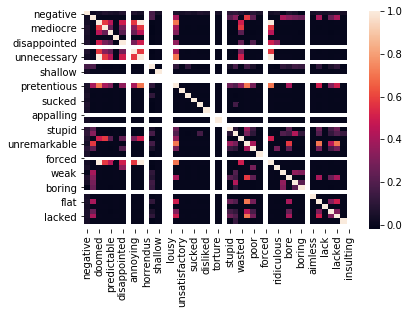

In [5]:
sns.heatmap(text_raw.corr())

In [6]:
data = text_raw[keywords]
target = text_raw['negative']

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 282


In [8]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(target, y_pred)
print(array)

[[378   8]
 [274  88]]


In [9]:
# (Type II) Mistakenly identified 274 messages as NOT NEGATIVE when they WERE NEGATIVE.

# Sensitivity
print(array[1][1] / (array[1][1] + array[1][0]))

# Specificity
print(array[0][0] / (array[0][1] + array[0][0]))

0.2430939226519337
0.9792746113989638


In [10]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.5733333333333334
Testing on Sample: 0.6229946524064172


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=20)

array([0.61538462, 0.51282051, 0.60526316, 0.60526316, 0.55263158,
       0.57894737, 0.67567568, 0.64864865, 0.7027027 , 0.62162162,
       0.56756757, 0.59459459, 0.59459459, 0.64864865, 0.64864865,
       0.62162162, 0.51351351, 0.64864865, 0.62162162, 0.64864865])

# Part II - Unit 2 / Lesson 3 / Project 4

#### Classifier new version 1. Classifying "positivity"

In [12]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw_1 = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw_1.columns = ['message', 'positive']

In [13]:
keywords_pos = ['best', 'cool', 'hilarious', 'appealing', 'good', 'greatest', 'in love', 'excellent',
            'perfect', 'masterpiece', 'beautiful', 'insane', 'fun', 'enjoy', 'love', 'believable',
            'enjoyed', 'convincing', 'amazing', 'thought-provoking', 'terrific', 'funny', 'fresh',
            'bold', 'nice', 'treat', 'like', 'liked', 'incredible', 'genius', 'perfected', 'fascinating',
           'fascinated', 'thrilled', 'thrill', 'thrilling', 'favourite', 'favorite', 'super', 'superb', 'recommend']

for key in keywords_pos:
    text_raw_1[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [14]:
text_raw_1['positive'] = (text_raw_1['positive'] == 0)

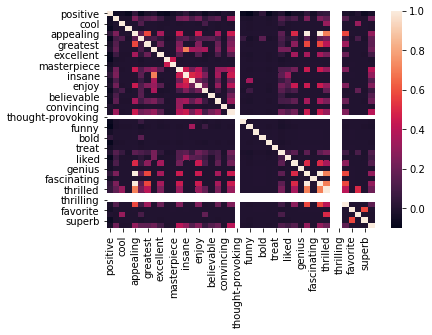

In [15]:
sns.heatmap(text_raw_1.corr())

In [16]:
data_1 = text_raw_1[keywords_pos]
target_1 = text_raw_1['positive']

In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_1, target_1)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_1.shape[0],
    (target_1 != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 287


In [18]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(target_1, y_pred)
print(array)

[[118 268]
 [ 19 343]]


In [19]:
# (Type II) Mistakenly identified 19 messages as NOT NEGATIVE when they WERE NEGATIVE.

# Sensitivity
print(array[1][1] / (array[1][1] + array[1][0]))

# Specificity
print(array[0][0] / (array[0][1] + array[0][0]))

0.9475138121546961
0.30569948186528495


In [20]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_1, target_1, test_size=0.1, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_1, target_1).score(data_1, target_1)))

With 20% Holdout: 0.6
Testing on Sample: 0.6163101604278075


In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_1, target_1, cv=20)

array([0.51282051, 0.64102564, 0.60526316, 0.47368421, 0.71052632,
       0.60526316, 0.48648649, 0.56756757, 0.59459459, 0.59459459,
       0.59459459, 0.51351351, 0.75675676, 0.67567568, 0.59459459,
       0.54054054, 0.62162162, 0.54054054, 0.51351351, 0.54054054])

#### Classifier new version 2. Classifying with both "negativity" and "negativity" word count

In [22]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw_2 = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw_2.columns = ['message', 'negative']

In [23]:
keywords_neg = ['crap', 'doomed', 'mediocre', 'predictable', 'lazy', 'disappointed', 'dissapointment', 'annoying',
                'unnecessary', 'horrendus', 'bad', 'shallow', 'insincere', 'lousy', 'pretentious', 'unsatisfactory',
                'hate', 'sucked', 'awful', 'disliked', 'appalling', 'torture', 'atrocity', 'stupid', 'waste', 'wasted',
                'unremarkable', 'poor', 'trash', 'forced', 'lame', 'ridiculous', 'weak', 'bore', 'bored', 'boring',
                'pointless', 'aimless', 'flat', 'lack', 'lacks', 'lacked', 'predictable', 'insult', 'insulting']

for key in keywords_neg:
    text_raw_2[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

text_raw_2['keywords_weight'] = text_raw_2[keywords_neg].sum(axis=1)

In [24]:
text_raw_2['negative'] = (text_raw_2['negative'] == 1)

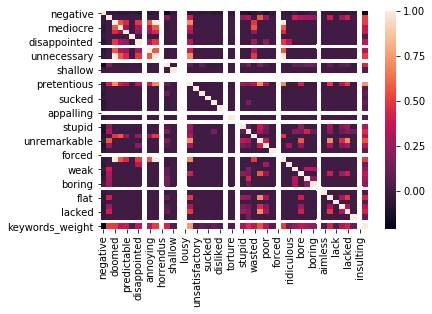

In [25]:
sns.heatmap(text_raw_2.corr())

In [26]:
data_2 = text_raw_2[keywords_neg + ['keywords_weight']]
target_2 = text_raw_2['negative']

In [27]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_2, target_2)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_2.shape[0],
    (target_2 != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 280


In [28]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(target_2, y_pred)
print(array)

[[ 91 271]
 [  9 377]]


In [29]:
# (Type II) Mistakenly identified 8 messages as NOT NEGATIVE when they WERE NEGATIVE.

# Sensitivity
print(array[1][1] / (array[1][1] + array[1][0]))

# Specificity
print(array[0][0] / (array[0][1] + array[0][0]))

0.9766839378238342
0.2513812154696133


In [30]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_2, target_2, test_size=0.1, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_2, target_2).score(data_2, target_2)))

With 20% Holdout: 0.6
Testing on Sample: 0.6256684491978609


In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_2, target_2, cv=20)

array([0.66666667, 0.56410256, 0.60526316, 0.60526316, 0.55263158,
       0.63157895, 0.7027027 , 0.64864865, 0.7027027 , 0.59459459,
       0.56756757, 0.67567568, 0.59459459, 0.64864865, 0.64864865,
       0.62162162, 0.54054054, 0.64864865, 0.62162162, 0.67567568])

#### Classifier new version 3. Classifying with both "negativity" and "positivity" and word count for each

In [32]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw_3 = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw_3.columns = ['message', 'negative']

In [33]:
keywords_neg = ['crap', 'doomed', 'mediocre', 'predictable', 'lazy', 'disappointed', 'dissapointment', 'annoying',
                'unnecessary', 'horrendus', 'bad', 'shallow', 'insincere', 'lousy', 'pretentious', 'unsatisfactory',
                'hate', 'sucked', 'awful', 'disliked', 'appalling', 'torture', 'atrocity', 'stupid', 'waste', 'wasted',
                'unremarkable', 'poor', 'trash', 'forced', 'lame', 'ridiculous', 'weak', 'bore', 'bored', 'boring',
                'pointless', 'aimless', 'flat', 'lack', 'lacks', 'lacked', 'predictable', 'insult', 'insulting']

for key in keywords_neg:
    text_raw_3[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

text_raw_3['keywords_weight_neg'] = text_raw_3[keywords_neg].sum(axis=1)

keywords_pos = ['best', 'cool', 'hilarious', 'appealing', 'good', 'greatest', 'in love', 'excellent',
            'perfect', 'masterpiece', 'beautiful', 'insane', 'fun', 'enjoy', 'love', 'believable',
            'enjoyed', 'convincing', 'amazing', 'thought-provoking', 'terrific', 'funny', 'fresh',
            'bold', 'nice', 'treat', 'like', 'liked', 'incredible', 'genius', 'perfected', 'fascinating',
           'fascinated', 'thrilled', 'thrill', 'thrilling', 'favourite', 'favorite', 'super', 'superb', 'recommend']

for key in keywords_pos:
    text_raw_3[str(key)] = text_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
text_raw_3['keywords_weight_pos'] = text_raw_3[keywords_pos].sum(axis=1)

In [34]:
text_raw_3['negative'] = (text_raw_3['negative'] == 1)

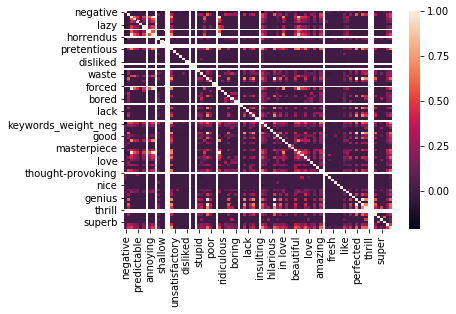

In [35]:
sns.heatmap(text_raw_3.corr())

In [36]:
data_3 = text_raw_3[keywords_neg + ['keywords_weight_neg'] + ['keywords_weight_pos']]
target_3 = text_raw_3['negative']

In [37]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_3, target_3)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_3.shape[0],
    (target_3 != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 280


In [38]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(target_3, y_pred)
print(array)

[[ 91 271]
 [  9 377]]


In [39]:
# (Type II) Mistakenly identified 9 messages as NOT NEGATIVE when they WERE NEGATIVE.

# Sensitivity
print(array[1][1] / (array[1][1] + array[1][0]))

# Specificity
print(array[0][0] / (array[0][1] + array[0][0]))

0.9766839378238342
0.2513812154696133


In [40]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_3, target_3, test_size=0.1, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_3, target_3).score(data_3, target_3)))

With 20% Holdout: 0.6
Testing on Sample: 0.6256684491978609


In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_3, target_3, cv=20)

array([0.66666667, 0.56410256, 0.60526316, 0.60526316, 0.55263158,
       0.63157895, 0.7027027 , 0.64864865, 0.7027027 , 0.59459459,
       0.56756757, 0.67567568, 0.59459459, 0.64864865, 0.64864865,
       0.62162162, 0.54054054, 0.64864865, 0.62162162, 0.67567568])

#### Classifier new version 4. Removing "positive" keywords to avoid false positives & sourced negative terms to avoid overfitting

In [161]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw_4 = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw_4.columns = ['message', 'negative']

In [162]:
# Source (http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html)
# Source (http://ptrckprry.com/course/ssd/data/negative-words.txt)

keywords_neg = open('keywords_neg.csv', 'r').read().split('\n')

In [163]:
# Search and replacing regex (regular expressions)

keywords_neg = [s.replace('*', '') for s in keywords_neg]

In [165]:
for key in keywords_neg:
    text_raw_4[str(key)] = text_raw_4.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [178]:
text_raw_4['keywords_weight_neg'] = text_raw_4[keywords_neg].sum(axis=1)

In [168]:
text_raw_4['negative'] = (text_raw_4['negative'] == 1)

In [170]:
data_4 = text_raw_4[keywords_neg + ['keywords_weight_neg']]
target_4 = text_raw_4['negative']

In [171]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_4, target_4)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_4.shape[0],
    (target_4 != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 2


In [172]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(target_4, y_pred)
print(array)

[[746   0]
 [  2   0]]


In [173]:
# (Type II) Mistakenly identified 2 messages as NOT NEGATIVE when they WERE NEGATIVE.

# Sensitivity
print(array[1][1] / (array[1][1] + array[1][0]))

# Specificity
print(array[0][0] / (array[0][1] + array[0][0]))

0.0
1.0


In [174]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_4, target_4, test_size=0.1, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_4, target_4).score(data_4, target_4)))

With 20% Holdout: 1.0
Testing on Sample: 0.9973262032085561


In [175]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_4, target_4, cv=20)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


array([0.97435897, 0.97435897, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

#### Classifier new version 5. Re-introducing "positive" terms (now sourced) and count to possibly better identify ham (positives)

In [181]:
# Grab and process the raw data.
training_text = ('imdb_labelled.txt')
# training_text = ('amazon_cells_labelled.txt')
text_raw_5 = pd.read_csv(training_text, delimiter= '\t', header=None)
text_raw_5.columns = ['message', 'negative']

In [182]:
# Source (http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html)
# Source (http://ptrckprry.com/course/ssd/data/negative-words.txt)
# Source (http://ptrckprry.com/course/ssd/data/positive-words.txt)

keywords_neg = open('keywords_neg.csv', 'r').read().split('\n')

keywords_pos = open('keywords_pos.csv', 'r').read().split('\n')

In [183]:
# Search and replacing regex (regular expressions)

keywords_neg = [s.replace('*', '') for s in keywords_neg]

In [184]:
for key in keywords_neg:
    text_raw_5[str(key)] = text_raw_5.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

for key in keywords_pos:
    text_raw_5[str(key)] = text_raw_5.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [185]:
text_raw_5['keywords_weight_neg'] = text_raw_5[keywords_neg].sum(axis=1)
text_raw_5['keywords_weight_pos'] = text_raw_5[keywords_pos].sum(axis=1)

In [186]:
text_raw_5['negative'] = (text_raw_5['negative'] == 1)

In [187]:
data_5 = text_raw_5[keywords_neg + keywords_pos + ['keywords_weight_neg'] + ['keywords_weight_pos']]
target_5 = text_raw_5['negative']

In [188]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_5, target_5)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_5.shape[0],
    (target_5 != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 2


In [189]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(target_5, y_pred)
print(array)

[[746   0]
 [  2   0]]


In [190]:
# (Type II) Mistakenly identified 2 messages as NOT NEGATIVE when they WERE NEGATIVE.

# Sensitivity
print(array[1][1] / (array[1][1] + array[1][0]))

# Specificity
print(array[0][0] / (array[0][1] + array[0][0]))

0.0
1.0


In [191]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_5, target_5, test_size=0.1, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_5, target_5).score(data_5, target_5)))

With 20% Holdout: 1.0
Testing on Sample: 0.9973262032085561


In [192]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_5, target_5, cv=20)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=20.
  % (min_groups, self.n_splits)), Warning)


array([0.97435897, 0.97435897, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

+ **Do any of your classifiers seem to overfit?**
- **Which seem to perform the best? Why?**
- **Which features seemed to be most impactful to performance?**

Classifiers appeared to overfit when I searched the test data for negative and positive terms. Cross validation showed varying scores. Importing sourced sets of many keywords seemed to take care of that and made all the difference in Specificity but perhaps made model Sensitivity weaker. I'm still uncertain of how to ID those positives (ham).